In [1]:
from fastai.vision import *
np.random.seed(10001)
from torchvision.models import *
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
import pretrainedmodels
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import sys

In [2]:
def read_data(root):
    train = pd.read_csv(Path(root) / "train.csv")
    test = pd.read_csv(Path(root) / "test.csv")
    return train, test

In [3]:
train_df, test_df = read_data("data")

In [4]:
tfms = ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0.3, 0.7), 'col_pct':(0.2, 0.8),'size':(224, 336), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.3, 0.3)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmPixel (cutout), kwargs={'n_holes': (1, 10), 'length': (4, 10)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-20.0, 20.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.2), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.45, 0.55)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.2)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={'size':(280, 420)}, p=1.0, resolved={}, do_run=True, is_random=True)])


In [5]:
cvlist = list(StratifiedKFold(10, random_state=12345786).split(train_df, train_df.category))

In [6]:
#?data2

In [7]:
#crop_pad(data2.train_ds[0][0], size=(224, 336), row_pct=0.8)

In [8]:
#data2 = ImageDataBunch.create_from_ll(src, ds_tfms=tfms, size=(280, 420), bs=32)
#data2.show_batch()

In [ ]:
for i in range(10):
    tr_idx, val_idx = cvlist[i]
    print(tr_idx.shape, val_idx.shape)
    src = (ImageList.from_df(train_df, path="data", folder="images").split_by_idxs(tr_idx, val_idx)
                                                        .label_from_df())
    data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms, size=(280, 420), bs=32)
    learn = cnn_learner(data, models.densenet169, metrics=accuracy, ps=0.5)
    learn.fit(10, wd=1e-5)
    learn.unfreeze()
    learn.fit(20, lr=slice(1e-5, 1e-4), wd=1e-1)
    for i in range(5):
        learn.fit_one_cycle((i+1)*2, max_lr=slice(3e-6, 3e-5), wd=1e-1)
    learn.save("densenet169_fold_{}.pth".format(i))
    #data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms, size=(330, 495), bs=24)
    #learn = cnn_learner(data, models.densenet169, metrics=accuracy, ps=0.5)
    #learn.load("densenet169_fold_{}.pth".format(i))
    #learn.fit(10, slice(1e-5, 1e-4), wd=1e-1)
    #for i in range(3):
    #    learn.fit_one_cycle((i+1)*2, max_lr=slice(1e-6, 1e-5), wd=1e-1)
    #learn.save("densenet169_fold_{}.pth".format(i))
    break

(5625,) (627,)


epoch,train_loss,valid_loss,accuracy,time
0,0.457874,0.313025,0.870813,01:29
1,0.301124,0.239677,0.917065,01:18
2,0.221057,0.186680,0.926635,01:17
3,0.221952,0.143859,0.937799,01:18
4,0.178238,0.152071,0.936204,01:17
5,0.147382,0.154699,0.944179,01:18
6,0.130407,0.145679,0.944179,01:18
7,0.110158,0.136900,0.955343,01:18
8,0.088922,0.122989,0.963317,01:18
9,0.088154,0.132872,0.961722,01:18


epoch,train_loss,valid_loss,accuracy,time
0,0.101569,0.151572,0.952153,01:39
1,0.071202,0.116950,0.964912,01:35
2,0.068774,0.114148,0.964912,01:36
3,0.059895,0.109401,0.961722,01:36
4,0.042689,0.110619,0.968102,01:35
5,0.038121,0.119905,0.961722,01:36
6,0.028681,0.118490,0.964912,01:35
7,0.036382,0.131925,0.958533,01:35
8,0.029379,0.118002,0.971292,01:35
9,0.029285,0.119106,0.966507,01:35


epoch,train_loss,valid_loss,accuracy,time
0,0.010110,0.116283,0.964912,01:35
1,0.012772,0.100507,0.971292,01:36


epoch,train_loss,valid_loss,accuracy,time
0,0.012508,0.102028,0.964912,01:36
1,0.010013,0.092094,0.969697,01:35
2,0.010441,0.096883,0.972887,01:35
3,0.005617,0.089483,0.971292,01:35


epoch,train_loss,valid_loss,accuracy,time
0,0.005679,0.087303,0.969697,01:35
1,0.010536,0.088185,0.971292,01:36
2,0.007291,0.093205,0.972887,01:35
3,0.004348,0.086665,0.972887,01:35
4,0.004100,0.082498,0.974482,01:35
5,0.008506,0.079938,0.974482,01:36


epoch,train_loss,valid_loss,accuracy,time
0,0.005058,0.093924,0.972887,01:36
1,0.005362,0.092860,0.971292,01:36
2,0.006945,0.107173,0.971292,01:36
3,0.007591,0.090152,0.974482,01:36
4,0.006834,0.088298,0.971292,01:36
5,0.004618,0.098437,0.971292,01:36
6,0.005320,0.091309,0.969697,01:35
7,0.003213,0.095238,0.969697,01:35


epoch,train_loss,valid_loss,accuracy,time
0,0.003825,0.091022,0.972887,01:35


In [ ]:
#i = 0
#tr_idx, val_idx = cvlist[i]
#print(tr_idx.shape, val_idx.shape)
#src = (ImageList.from_df(train_df, path="data", folder="images").split_by_idxs(tr_idx, val_idx)
#                                                    .label_from_df())
#data = ImageDataBunch.create_from_ll(src, ds_tfms=tfms, size=(240, 360), bs=24)
#learn = cnn_learner(data, models.densenet169, metrics=accuracy, ps=0.5)
#learn.load("densenet169_fold_{}".format(i))
#data.show_batch()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


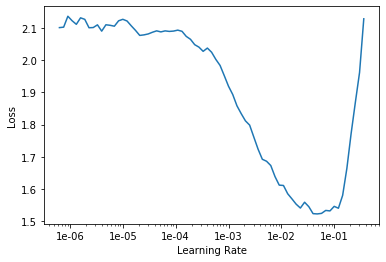

In [8]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
for i in range(5):
    learn.fit_one_cycle(10, max_lr=1e-5)

In [ ]:
#Make test predictions

In [8]:
#def inceptionv4(pretrained=True):
#    pretrained = 'imagenet' if pretrained else None
#    model = pretrainedmodels.inceptionv4(pretrained=pretrained)
#    all_layers = list(model.children())
#    return nn.Sequential(*all_layers[0], *all_layers[1:])

In [10]:
#learn.summary()

epoch,train_loss,valid_loss,accuracy,time
0,0.597837,0.368182,0.866720,00:50
1,0.438075,0.299839,0.898643,00:47
2,0.404167,0.284759,0.901836,00:47
3,0.387975,0.252394,0.902634,00:47


In [13]:
learn.save("densenet_210.pth")

In [14]:
tfm = ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'size':(120, 180), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  #RandTransform(tfm=TfmPixel (cutout), kwargs={'n_holes': (1, 10), 'length': (4, 10)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-30.0, 30.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.35), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={'size':(140, 210)}, p=1.0, resolved={}, do_run=True, is_random=True)])

src = (ImageList.from_df(train_df, path="data", folder="images").split_by_idxs(tr_idx, val_idx)
                                                        .label_from_df())
data = ImageDataBunch.create_from_ll(src, ds_tfms=tfm, size=(240, 360), bs=24)

In [15]:
learn = cnn_learner(data, models.densenet169, metrics=accuracy, ps=0.7)
learn.load("densenet_210.pth")

Learner(data=ImageDataBunch;

Train: LabelList (4999 items)
x: ImageList
Image (3, 240, 360),Image (3, 240, 360),Image (3, 240, 360),Image (3, 240, 360),Image (3, 240, 360)
y: CategoryList
3,3,3,3,3
Path: data;

Valid: LabelList (1253 items)
x: ImageList
Image (3, 240, 360),Image (3, 240, 360),Image (3, 240, 360),Image (3, 240, 360),Image (3, 240, 360)
y: CategoryList
1,1,2,3,2
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace)
          (conv1): Conv2d(64

In [16]:
learn.fit(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.271129,0.183048,0.938547,01:17
1,0.244397,0.158686,0.939346,01:07
2,0.227607,0.154639,0.944134,01:07
3,0.196907,0.160672,0.948923,01:07
4,0.193728,0.148874,0.944932,01:06
5,0.163105,0.163452,0.946528,01:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


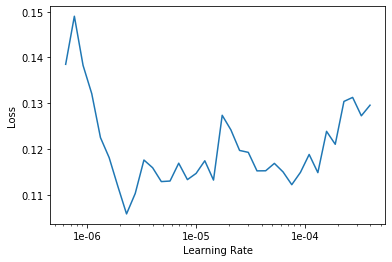

In [17]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit(20, lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.120462,0.135273,0.948923,01:18
1,0.118367,0.136423,0.950519,01:19


epoch,train_loss,valid_loss,accuracy,time
0,0.108149,0.127982,0.949721,01:19
1,0.113702,0.130545,0.952913,01:19
2,0.112179,0.134035,0.952115,01:19
3,0.113925,0.135278,0.948923,01:19


epoch,train_loss,valid_loss,accuracy,time
0,0.101154,0.122928,0.954509,01:19
1,0.094195,0.129473,0.957702,01:19
2,0.083918,0.128393,0.952115,01:19
3,0.089968,0.125104,0.956105,01:19
4,0.070454,0.124660,0.954509,01:19
5,0.084359,0.120819,0.955307,01:19


epoch,train_loss,valid_loss,accuracy,time
0,0.073152,0.122666,0.952115,01:18
1,0.076764,0.127224,0.952115,01:19
2,0.069278,0.128017,0.959298,01:19


KeyboardInterrupt: 

In [ ]:
learn.save("densenet_360_finetuned.pth")

In [ ]:
tfm = ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'size':(120, 180), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  #RandTransform(tfm=TfmPixel (cutout), kwargs={'n_holes': (1, 10), 'length': (4, 10)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.35), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={'size':(140, 210)}, p=1.0, resolved={}, do_run=True, is_random=True)])

src = (ImageList.from_df(train_df, path="data", folder="images").split_by_idxs(tr_idx, val_idx)
                                                        .label_from_df())
data = ImageDataBunch.create_from_ll(src, ds_tfms=tfm, size=(260, 540), bs=16)

In [ ]:
learn = cnn_learner(data, models.densenet169, metrics=accuracy, ps=0.75)
learn.load("densenet_360_finetuned.pth")

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [28]:
for i in range(5):
    learn.fit_one_cycle((i+1)*2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.204048,0.137060,0.950519,01:10
1,0.148368,0.140292,0.952115,01:10
2,0.135848,0.163484,0.944134,01:11
3,0.103715,0.143240,0.949721,01:11


KeyboardInterrupt: 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


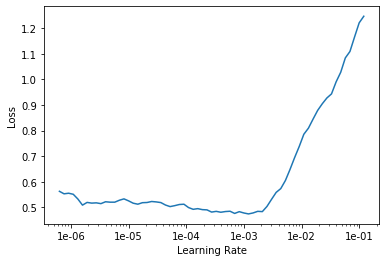

In [31]:
learn.save("densenet_540_finetuned.pth")

In [36]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

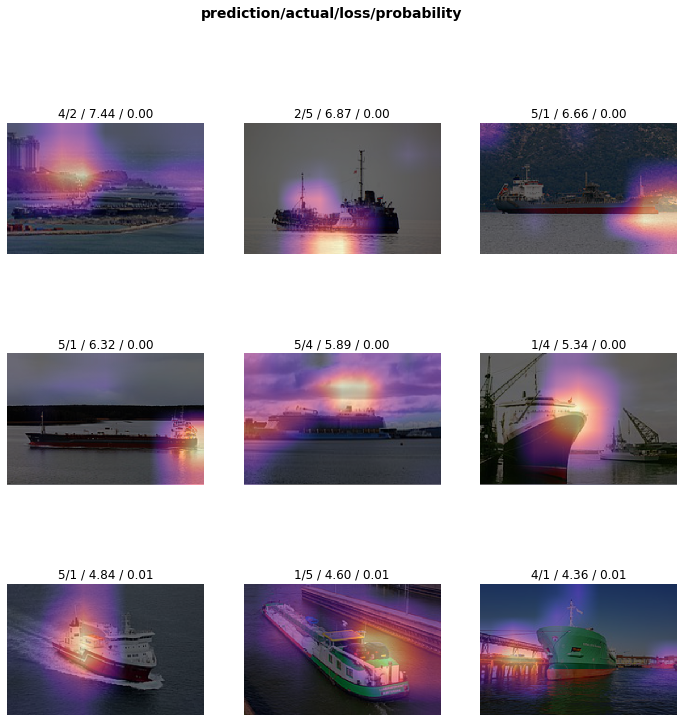

In [38]:
interp.plot_top_losses(k=9, heatmap=True)

In [ ]:
data.add_test(ImageList.from_df(test_df, path="data", folder="images"))

In [ ]:
test_preds = learn.get_preds(ds_type=DatasetType.Test)
y_test_preds = np.argmax(test_preds[0].numpy(), axis=1) + 1

In [ ]:
sub = test_df[["image"]]
sub["category"] = y_test_preds
sub.head()

In [ ]:
sub.to_csv("subv2.csv", index=False)